In [2]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set as sset; sset()
from sklearn.linear_model import LinearRegression

In [3]:
# constants ----------------------------------

class Constants:
    def __init__(self, l: float):
        self.l = l
        
constants = Constants(l=1)

In [4]:
# simulator function ------------------------

def random_walk(t_max: float, p: float, number_of_tests: int) -> np.ndarray:
    r2 = np.zeros(t_max)
    
    for t in range(t_max):
        went_x_positive_direction = np.random.binomial(t, p, number_of_tests)
        went_x_negative_direction = t - went_x_positive_direction
        
        went_y_positive_direction = np.random.binomial(t, p, number_of_tests)
        went_y_negative_direction = t - went_y_positive_direction
        
        x = (went_x_positive_direction - went_x_negative_direction) * constants.l
        y = (went_y_positive_direction - went_y_negative_direction) * constants.l
        
        r2[t] = (x**2 + y**2).mean()
        
    return r2

In [5]:
r2 = random_walk(t_max=500, p=1/2, number_of_tests=100000)

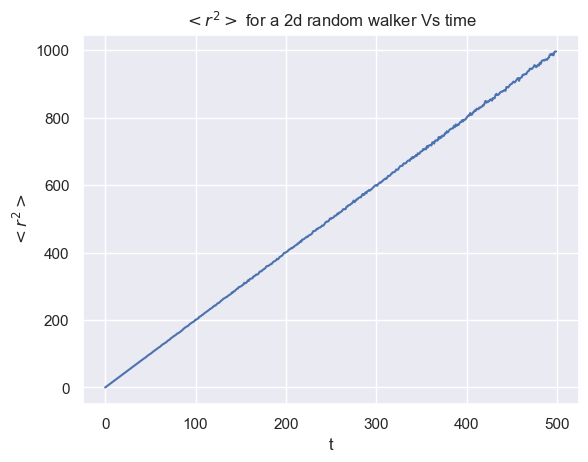

In [6]:
plt.xlabel("t")
plt.ylabel("$<r^2>$")
plt.title("$<r^2>$ for a 2d random walker Vs time")

x = np.arange(500)

plt.plot(x, r2);

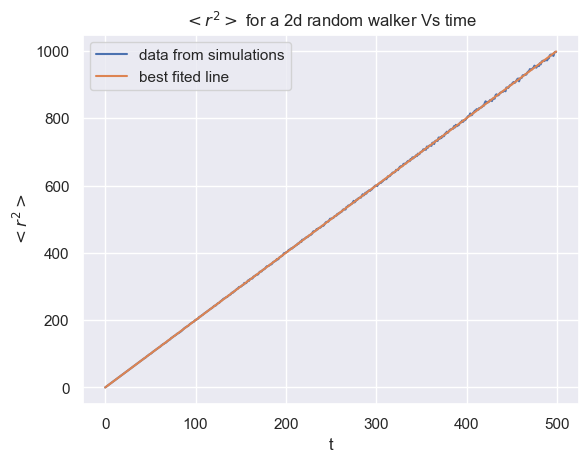

In [7]:
plt.xlabel("t")
plt.ylabel("$<r^2>$")
plt.title("$<r^2>$ for a 2d random walker Vs time")

x = np.arange(500)

reg = LinearRegression().fit(x.reshape(-1, 1), r2)

plt.plot(x, r2, label="data from simulations")
plt.plot(x, reg.predict(x.reshape(-1, 1)), label="best fited line")

plt.legend();

In [8]:
print(f"the best line is: <r^2> = {round(reg.coef_[0], 3)}t + {round(reg.intercept_, 3)}\nwith score: {round(reg.score(x.reshape(-1, 1), r2), 3)}")

the best line is: <r^2> = 2.001t + 0.016
with score: 1.0
